In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("ITSalarySurveyEU2020.csv")

df.tail()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0
1252,19/01/2021 12:01:11,26.0,Male,Berlin,DevOps,2,2,Middle,yaml,"Python, AWS, Kubernetes, Docker, terraform, an...",...,0,30,Full-time employee,Unlimited contract,English,51-100,Startup,No,30.0,600


In [3]:
# List all columns
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [4]:
# Remove columns that we don't need
df.drop(
    labels=[
        'Timestamp',
        'Number of vacation days',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'
    ],
    axis = 1,
    inplace = True,
)

In [5]:
# Drop Missing Values
df.dropna(
    axis=0,
    how='any',
    inplace=True,
)

In [6]:
# Get a description of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1252
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Age                                                      1039 non-null   float64
 1   Gender                                                   1039 non-null   object 
 2   City                                                     1039 non-null   object 
 3   Position                                                 1039 non-null   object 
 4   Total years of experience                                1039 non-null   object 
 5   Years of experience in Germany                           1039 non-null   object 
 6   Seniority level                                          1039 non-null   object 
 7   Your main technology / programming language              1039 non-null   object 
 8   Employment status           

In [7]:
# Check for unique values for all columns

# Get all columns
all_columns = df.columns
# Loop though all columns
for one in all_columns:
    print(f"{one} - Column")
    print(df[one].unique())

Age - Column
[26. 29. 28. 37. 32. 24. 35. 34. 31. 27. 25. 59. 36. 38. 40. 39. 33. 30.
 49. 48. 44. 66. 45. 43. 42. 46. 56. 53. 41. 65. 47. 22. 23. 50. 51. 20.
 54.]
Gender - Column
['Male' 'Female' 'Diverse']
City - Column
['Munich' 'Berlin' 'Hamburg' 'Wolfsburg' 'Schleswig-Holstein'
 'Konstanz area' 'Frankfurt' 'Cologne' 'Kempten' 'Münster' 'Rosenheim'
 'Mannheim ' 'Stuttgart' 'Boeblingen' 'Düsseldorf' 'Ingolstadt' 'Nürnberg'
 'Ansbach' 'Leipzig' 'Mannheim' 'Tuttlingen' 'Bonn' 'Moscow' 'Warsaw'
 'Heidelberg' 'Aachen' 'Riga, Latvia' 'Dusseldorf' 'Helsinki' 'Würzburg'
 'Kiev' 'Den Haag' 'London' 'Amsterdam' 'Tallinn' 'Prague' 'Utrecht'
 'Stockholm' 'Braunschweig ' 'Dresden' 'Kyiv' 'Stuttgart ' 'Lübeck'
 'Nuremberg ' 'Bodensee' 'Milan' 'Salzburg' 'Rome' 'Karlsruhe' 'Cupertino'
 'Paris' 'Dublin ' 'Paderborn' 'Konstanz' 'Ulm' 'Barcelona' 'Bölingen'
 'Tampere (Finland)' 'Siegen' 'Minsk' 'Düsseldorf ' 'Nuremberg'
 'Friedrichshafen' 'Hannover' 'Walldorf' 'France' 'Regensburg'
 'Warsaw, Poland

In [8]:
# Clean "Have you lost your job due to the coronavirus outbreak?"
df['Have you lost your job due to the coronavirus outbreak?'] = df['Have you lost your job due to the coronavirus outbreak?'].map(
    {
        "No" : "No",
        "Yes" : "Yes",
        "i didn't but will be looking for new one because of covid" : "No",
        "Have been a freelancer at the beginning of year" : "Yes",
        "No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months" : "No",
        "Leads and project inquiries have slowed down" : "Yes",
        "Laid off for a bit" : "Yes",
        "yes but found a new one with better pay / perks" : "Yes"
    }
)

df['Have you lost your job due to the coronavirus outbreak?'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
# Clean "Years of experience in Germany"
all_values = ['3', '4', '6', '1', '0.4', '2', '5', '9', '30', '7', '15', '11', '10', '18', '0', '2.5',
 '1,5', '1.5', '0.5', '13', '14', '8', '3.5', '0.8', '12', '3,5', '20', '0.9', '25',
 '< 1', '0.25', '16', '19', '2,5', '3 months', '0,5', '4.5', '0.1', '2.6',
 '3 (in Poland)', '0,3', '-', '0.2', 'less than year']

to_exclude = ["1,5","< 1", "2,5", "3 months", "0,5", "3 (in Poland)", "0,3", "-", "less than year", "3,5"]

new_list = [value for value in all_values if value not in to_exclude]
new_dict = {}

for one in new_list:
    my_dict = {
        f"{one}" : one,
    }
    new_dict.update(my_dict)

total_dict = {
        "1,5" : "1.5",
        "< 1" : "1",
        "2,5" : "2.5",
        "3,5" : "3.5",
        "3 months" : "0.4",
        "0,5" : "0.5",
        "3 (in Poland)" : "3",
        "0,3" : "0.3",
        "-" : "0",
        "less than year" : "1"
    }
# Merge the two dictonaries
def Merge(dict1, dict2):
    return(dict2.update(dict1))
Merge(new_dict, total_dict)

df['Years of experience in Germany'] = df['Years of experience in Germany'].map(
    total_dict
)
df['Years of experience in Germany'].unique()

array(['3', '4', '6', '1', '0.4', '2', '5', '9', '30', '7', '15', '11',
       '10', '18', '0', '2.5', '1.5', '0.5', '13', '14', '8', '3.5',
       '0.8', '12', '20', '0.9', '25', '0.25', '16', '19', '4.5', '0.1',
       '2.6', nan, '0.3', '0.2'], dtype=object)

In [10]:
# Clean "Seniority level"
all_values = ['Senior', 'Lead', 'Junior', 'Middle', 'VP', 'Work Center Manager', 'Head', 'CTO',
 'No level ', 'Director', 'C-level executive manager', 'Principal', 'intern',
 'Student', 'no idea, there are no ranges in the firm ', 'C-Level',
 'Working Student', 'student']

to_exclude = ["Working Student","student", "no idea, there are no ranges in the firm "]

new_list = [value for value in all_values if value not in to_exclude]
new_dict = {}

for one in new_list:
    my_dict = {
        f"{one}" : one,
    }
    new_dict.update(my_dict)

total_dict = {
        "Working Student" : "Student",
        "student" : "Student",
        "no idea, there are no ranges in the firm " : "No level "
    }
# Merge the two dictonaries
def Merge(dict1, dict2):
    return(dict2.update(dict1))
Merge(new_dict, total_dict)

df['Seniority level'] = df['Seniority level'].map(
    total_dict
)
df['Seniority level'].unique()

array(['Senior', 'Lead', 'Junior', 'Middle', 'VP', nan,
       'Work Center Manager', 'Head', 'CTO', 'No level ', 'Director',
       'C-level executive manager', 'Principal', 'intern', 'Student',
       'C-Level'], dtype=object)

In [11]:
# Clean "Total years of experience"
all_values = ['5', '7', '12', '4', '17', '6', '8', '15', '2', '14', '11', '30', '18', '13', '10', '25',
 '3', '40', '26', '9', '19', '20', '5.5', '22', '16', '0.8', '1', '1.5', '21', '2.5',
 '28', '29', '23', '1,5', '24', '0', '4.5', '27',
 '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO', '31',
 '6 (not as a data scientist, but as a lab scientist)', '3.5',
 'less than year']

to_exclude = [
    "less than year",
    "6 (not as a data scientist, but as a lab scientist)", 
    "15, thereof 8 as CTO", 
    "2,5", 
    "1 (as QA Engineer) / 11 in total",
    "1,5"
]

new_list = [value for value in all_values if value not in to_exclude]
new_dict = {}

for one in new_list:
    my_dict = {
        f"{one}" : one,
    }
    new_dict.update(my_dict)

total_dict = {
        "less than year" : "1",
        "6 (not as a data scientist, but as a lab scientist)" : "6",
        "15, thereof 8 as CTO" : "15",
        "2,5" : "2.5",
        "1 (as QA Engineer) / 11 in total": "11",
        "1,5": "1.5"
    }
# Merge the two dictonaries
def Merge(dict1, dict2):
    return(dict2.update(dict1))
Merge(new_dict, total_dict)

df['Total years of experience'] = df['Total years of experience'].map(
    total_dict
)
df['Total years of experience'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '14', '11', '30',
       '18', '13', '10', '25', '3', '40', '26', '9', '19', '20', '5.5',
       '22', '16', '0.8', '1', '1.5', '21', '2.5', '28', '29', '23', '24',
       '0', '4.5', '27', '31', '3.5'], dtype=object)

In [13]:
# Clean "Employment status"
all_values = ['Full-time employee', 'Self-employed (freelancer)', 'Founder',
 'Part-time employee', 'working student', 'Working Student',
 'Full-time position, part-time position, & self-employed (freelancing, tutoring)',
 'Intern',
 "full-time, but 32 hours per week (it was my request, I'm a student)", 
 'Werkstudent']

to_exclude = [
    'working student', 
    "full-time, but 32 hours per week (it was my request, I'm a student)", 
    'Werkstudent',
]

new_list = [value for value in all_values if value not in to_exclude]
new_dict = {}

for one in new_list:
    my_dict = {
        f"{one}" : one,
    }
    new_dict.update(my_dict)

total_dict = {
    'working student': 'Working Student', 
    "full-time, but 32 hours per week (it was my request, I'm a student)": 'Working Student', 
    'Werkstudent': 'Working Student',
    }
# Merge the two dictonaries
def Merge(dict1, dict2):
    return(dict2.update(dict1))
Merge(new_dict, total_dict)

df['Employment status'] = df['Employment status'].map(
    total_dict
)
df['Employment status'].unique()

array(['Full-time employee', 'Self-employed (freelancer)', 'Founder',
       'Part-time employee', 'Working Student',
       'Full-time position, part-time position, & self-employed (freelancing, tutoring)',
       'Intern'], dtype=object)

In [14]:
# Check for unique values for all columns

# Get all columns
all_columns = df.columns
# Loop though all columns
for one in all_columns:
    print(f"{one} - Column")
    print(df[one].unique())

Age - Column
[26. 29. 28. 37. 32. 24. 35. 34. 31. 27. 25. 59. 36. 38. 40. 39. 33. 30.
 49. 48. 44. 66. 45. 43. 42. 46. 56. 53. 41. 65. 47. 22. 23. 50. 51. 20.
 54.]
Gender - Column
['Male' 'Female' 'Diverse']
City - Column
['Munich' 'Berlin' 'Hamburg' 'Wolfsburg' 'Schleswig-Holstein'
 'Konstanz area' 'Frankfurt' 'Cologne' 'Kempten' 'Münster' 'Rosenheim'
 'Mannheim ' 'Stuttgart' 'Boeblingen' 'Düsseldorf' 'Ingolstadt' 'Nürnberg'
 'Ansbach' 'Leipzig' 'Mannheim' 'Tuttlingen' 'Bonn' 'Moscow' 'Warsaw'
 'Heidelberg' 'Aachen' 'Riga, Latvia' 'Dusseldorf' 'Helsinki' 'Würzburg'
 'Kiev' 'Den Haag' 'London' 'Amsterdam' 'Tallinn' 'Prague' 'Utrecht'
 'Stockholm' 'Braunschweig ' 'Dresden' 'Kyiv' 'Stuttgart ' 'Lübeck'
 'Nuremberg ' 'Bodensee' 'Milan' 'Salzburg' 'Rome' 'Karlsruhe' 'Cupertino'
 'Paris' 'Dublin ' 'Paderborn' 'Konstanz' 'Ulm' 'Barcelona' 'Bölingen'
 'Tampere (Finland)' 'Siegen' 'Minsk' 'Düsseldorf ' 'Nuremberg'
 'Friedrichshafen' 'Hannover' 'Walldorf' 'France' 'Regensburg'
 'Warsaw, Poland

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1252
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Age                                                      1039 non-null   float64
 1   Gender                                                   1039 non-null   object 
 2   City                                                     1039 non-null   object 
 3   Position                                                 1039 non-null   object 
 4   Total years of experience                                1039 non-null   object 
 5   Years of experience in Germany                           1036 non-null   object 
 6   Seniority level                                          1036 non-null   object 
 7   Your main technology / programming language              1039 non-null   object 
 8   Employment status           

In [19]:
# Drop Null Values - If present
df.dropna(inplace=True)

# Check the description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1252
Data columns (total 14 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Age                                                      1033 non-null   float64
 1   Gender                                                   1033 non-null   object 
 2   City                                                     1033 non-null   object 
 3   Position                                                 1033 non-null   object 
 4   Total years of experience                                1033 non-null   object 
 5   Years of experience in Germany                           1033 non-null   object 
 6   Seniority level                                          1033 non-null   object 
 7   Your main technology / programming language              1033 non-null   object 
 8   Employment status           

# Univariate Analysis

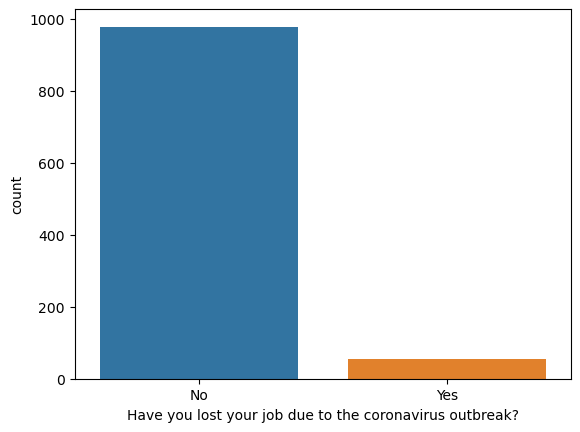

In [25]:
# See the number of people who lost a job
sns.countplot(data=df, x="Have you lost your job due to the coronavirus outbreak?")
plt.show()

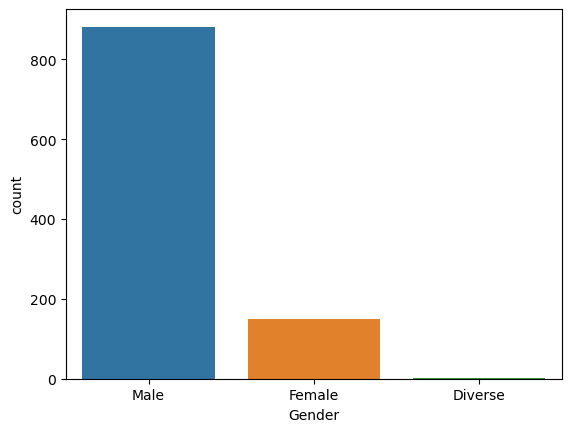

In [28]:
# See the gender
sns.countplot(data=df, x="Gender")
plt.show()

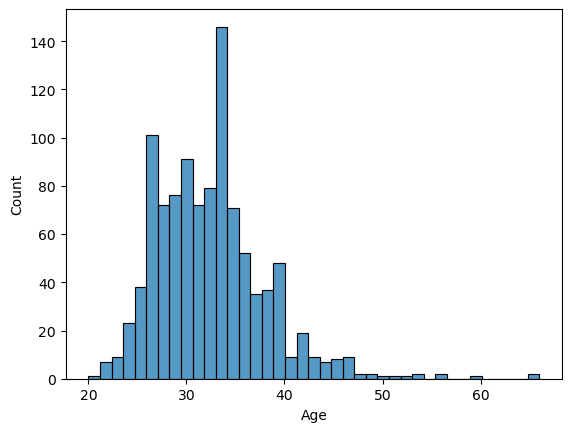

In [36]:
sns.histplot(
    x="Age",
    data=df
)
plt.show()

# Bivariate Analysis

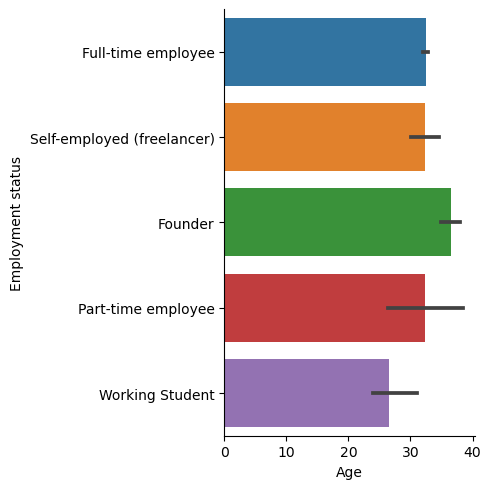

In [35]:
# Age against Employment status
sns.catplot(
    data=df, kind="bar",
    x="Age", y="Employment status",
)
plt.show()